# Lecture 1-3: Differential equations

### Introduction

We just talked about [Euler's method](https://en.wikipedia.org/wiki/Euler_method), a simple approach for numerically solving differential equations that are hard to do by hand. Euler's method works by discretizing time and incrementing the function step by step. If we have a differential equation of the form

$$ \frac{d x}{d t} = f(x, t)\,, $$

we can numerically evaluate $x(t)$ with Euler's method by breaking time into small segments $\Delta t$ and iteratively computing

$$ x(t + \Delta t) = x(t) + \Delta t \times f(x, t) + \mathcal{O}\left(\Delta t\right)^2\,.$$


### Writing modular functions

Like numerical integration, numerically solving differential equations involves multiple steps. In particular, we need to:
- Break an interval of time up into individual pieces.
- Then, for each piece:
    - Evaluate the current time derivative of the function.
    - Use the time derivative to increment the value of the function.
    - Record the value of the function.
- And return the results.

At first, this can seem complicated. One way to approach a large, challenging computational problem is to break it up into smaller, **modular** pieces. We'll give this a try by writing small functions to perform each of the major steps above.

Let's start by just considering the first step: given a start time, an end time, and the number of pieces that we want to divide the interval into, let's produce a list of time steps. Let's also test the function to make sure that it behaves the way that we expect it to.

In [2]:
import numpy as np

def get_times(tstart, tend, n_steps): # This function gets the time steps -- add arguments here
    dt = (tend - tstart) / n_steps
    return np.arange(tstart, tend+dt, dt)
    # The body of the function goes here
    # Then we will return the result
    
# And now, let's run some simple tests
get_times(0, 1, 10)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Now that we can get the time steps, our next task is to write a function that updates $x(t)$. As a reminder, Euler's method does this by computing

$$ x(t + \Delta t) \approx x(t) + \Delta t \times f(x, t)\,.$$

That means that, to get $x(t+\Delta t)$, we need to know
- the current $x(t)$,
- the derivative $f(x, t)$,
- the time $t$, and
- the time step $\Delta t$.

Using all that information, we can estimate $x(t+\Delta t)$. Let's write a function to do that now, and let's test it to make sure that it works as expected. 

In [3]:
def increment_x(x, fx, dt): # This function gets x(t + dt) -- add arguments here
    return x + dt * fx
    # The body of the function goes here
    # Then we return the result
    
# And now, let's run some simple tests
increment_x(0, 1, 0.1)

0.1

### Combining subfunctions into a larger function

Above, we wrote functions to break time into discrete steps and to update the function $x(t)$ that we are numerically integrating. Now we can combine these two subfunctions together to make one larger function that performs numerical integration. You don't always have to use this kind of structure, but it has a few advantages:
- Modular functions are easy to understand at a glance.
- Modular functions are easier to debug and update.
- Modular functions are "safer" because local variables are compartmentalized into subfunctions.

In the space below, let's combine the subfunctions into one larger function for numerical integration. Let's also print out intermediate variables as we go along so we can check to see how the function is working (**note:** this can be very helpful for debugging code!).

There are many different ways that we could write this kind of function, but let's make it so that the function returns two arrays `x_vals` and `times`, that give values of $x(t)$ at discrete time steps.

In [0]:
def integrate(f, x0, tstart, tend, n_steps): # This function integrates a differential equation
    # get time steps
    times = get_times(tstart, tend, n_steps)
    dt = (tend - tstart)/n_steps

    # get function values
    x = x0
    x_vals = [x0]
    for i in range(n_steps):
      x = increment_x(x, f(x, times[i]), dt)
      x_vals.append(x)

    return x_vals, times
    
# And now, let's run some simple tests

### Visualizing Euler's method in a simple case

Now, let's plot the result for the differential equation

$$ \frac{dx}{dt} = -x^3 + 0.1\,.$$

What do you expect the result will be if we start with $x(0) = 0$? We'll integrate from $t=0$ to $t=10$.

0.4641588833612779


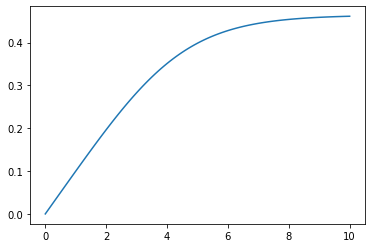

In [8]:
def f(x, t):
  return -x**3 + 0.1

x_vals, times = integrate(f, 0, 0, 10, 100)

import seaborn as sns
sns.lineplot(times, x_vals)
print(0.1**(1/3))

### Unphysical results

What happens if we choose a very small number of steps? For example, we could set $n=3$.

This is a very simple example of a phenomenon known as **[stiffness](https://en.wikipedia.org/wiki/Stiff_equation)**, which can pose a challenge for numerical differential equation solvers. We need to be especially wary when considering differential equations for multiple variables that have large differences in parameter sizes, or when some terms in the differential equation can grow very large with small shifts in the variables.

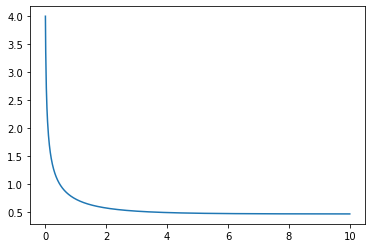

In [12]:
x_vals, times = integrate(f, 4, 0, 10, 1000)

import seaborn as sns
sns.lineplot(times, x_vals)

### Further checks on the expected behavior

Consider different initial conditions for the differential equations. Do these all reach the same result?